In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from scipy.spatial.distance import euclidean

from metric_forest import MetricForest
from metric_tree import MetricTree
from search_algorithms import exact_nn_search, defeatist_search,  search_pruning, search_pruning_in_forest, search_defeatist_in_forest
from search_alg_visited_nodes import defeatist_search_vn, search_pruning_vn, search_defeatist_in_forest_vn, search_pruning_in_forest_vn

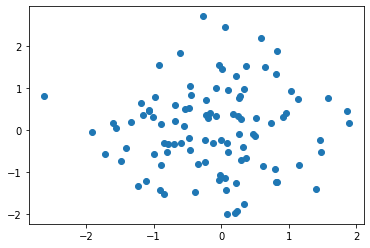

In [2]:
n_points = 100
np.random.seed(42)
points = np.random.randn(100, 2)
plt.scatter(points[:,0], points[:,1])

In [3]:
forest = MetricForest(0.5, points)

In [4]:
forest.forest

[MetricForest: root=[0.64768854 1.52302986],
 MetricForest: root=[ 1.15859558 -0.82068232],
 MetricForest: root=[-0.07710171  0.34115197],
 MetricForest: root=[-1.32818605  0.19686124],
 MetricForest: root=[-0.8084936  -0.50175704],
 MetricForest: root=[ 0.62566735 -0.85715756]]

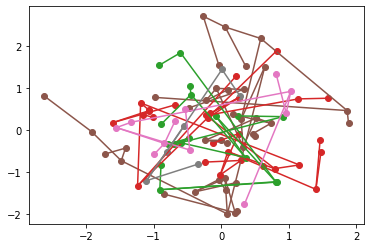

In [6]:
forest.plot()

In [5]:
q = np.random.rand(2)
print(exact_nn_search(points, q))
result, min_dist = search_pruning_in_forest(forest, q)
print(result, min_dist)

(array([0.73846658, 0.17136828]), 100)
[0.73846658 0.17136828] 0.10608246050724418


In [33]:
correct = 0
n_try = 100000
pbar = tqdm(range(n_try), desc="Test pruning search forest")
for i in pbar:
    q = np.random.rand(2)
    true_nn = exact_nn_search(points, q)[0]
    result = search_pruning_in_forest(forest, q)[0]
    correct += 1 if (true_nn == result).all() else 0
    pbar.set_postfix({"Precision": correct/(i+1)}) 

In [34]:
correct/n_try

1.0

In [30]:
result, min_dist = search_defeatist_in_forest(forest, q)
print(result, min_dist)

[0.91540212 0.32875111] 0.15310150189149987


In [31]:
correct = 0
n_try = 100000
pbar = tqdm(range(n_try), desc="Test defeatist search forest")
for i in pbar:
    q = np.random.rand(2)
    true_nn = exact_nn_search(points, q)[0]
    result = search_defeatist_in_forest(forest, q)[0]
    correct += 1 if (true_nn == result).all() else 0
    pbar.set_postfix({"Precision": correct/(i+1)}) 

In [32]:
correct/n_try

0.84043

In [10]:
result, min_dist, visited_nodes = search_pruning_in_forest_vn(forest, q)
print(result, min_dist, visited_nodes)

[0.09707755 0.96864499] 0.03567902185717903 41


In [6]:
result, min_dist, visited_nodes = search_defeatist_in_forest_vn(forest, q)
print(result, min_dist, visited_nodes)

[0.73846658 0.17136828] 0.10608246050724418 21
